In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -2.8 < rapidity < -2.5

Y_OS = [3493.0, 3546.0, 3420.0, 3541.0, 3354.0, 3393.0, 3425.0, 3331.0, 3378.0, 3246.0, 3170.0, 3158.0, 
        3093.0, 3002.0, 2901.0, 2870.0, 2723.0, 2696.0, 2653.0, 2620.0, 2460.0, 2424.0, 2452.0, 2243.0, 
        2223.0, 2129.0, 1992.0, 2038.0, 1955.0, 1838.0, 1880.0, 1820.0, 1720.0, 1689.0, 1661.0, 1625.0, 
        1546.0, 1556.0, 1563.0, 1725.0, 1889.0, 2144.0, 2541.0, 3399.0, 4347.0, 5096.0, 4863.0, 3816.0, 
        2478.0, 1483.0, 1020.0, 856.0, 761.0, 752.0, 695.0, 704.0, 648.0, 622.0, 627.0, 609.0, 607.0, 
        638.0, 616.0, 594.0, 526.0, 507.0, 476.0, 428.0, 422.0, 435.0, 326.0, 370.0, 388.0, 346.0, 390.0, 
        336.0, 321.0, 328.0, 312.0, 298.0, 326.0, 302.0, 287.0, 277.0, 270.0, 265.0, 256.0, 242.0, 236.0, 
        243.0, 229.0, 222.0, 209.0, 213.0, 204.0, 210.0, 195.0, 168.0, 173.0, 180.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [818.0, 816.0, 808.0, 779.0, 834.0, 715.0, 758.0, 732.0, 720.0, 706.0, 701.0, 653.0, 634.0, 594.0, 
        634.0, 618.0, 607.0, 601.0, 518.0, 534.0, 520.0, 479.0, 512.0, 496.0, 485.0, 473.0, 427.0, 425.0, 
        453.0, 412.0, 408.0, 357.0, 412.0, 438.0, 378.0, 411.0, 350.0, 355.0, 375.0, 304.0, 324.0, 327.0, 
        303.0, 285.0, 338.0, 280.0, 274.0, 286.0, 265.0, 260.0, 250.0, 270.0, 273.0, 276.0, 255.0, 233.0, 
        241.0, 220.0, 229.0, 217.0, 232.0, 223.0, 194.0, 197.0, 207.0, 162.0, 186.0, 205.0, 178.0, 172.0, 
        176.0, 180.0, 190.0, 161.0, 159.0, 173.0, 158.0, 142.0, 140.0, 148.0, 160.0, 144.0, 148.0, 141.0, 
        141.0, 133.0, 138.0, 139.0, 129.0, 111.0, 118.0, 157.0, 132.0, 114.0, 120.0, 111.0, 99.0, 122.0, 
        125.0, 88.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [6.0, 7.0, 9.0, 11.0, 9.0, 10.0, 13.0, 11.0, 27.0, 20.0, 23.0, 27.0, 25.0, 45.0, 43.0, 54.0, 
          64.0, 71.0, 87.0, 99.0, 100.0, 112.0, 126.0, 133.0, 144.0, 168.0, 195.0, 223.0, 227.0, 266.0, 
          292.0, 342.0, 362.0, 379.0, 484.0, 545.0, 764.0, 903.0, 1195.0, 1600.0, 2146.0, 3139.0, 4471.0, 
          6624.0, 10013.0, 12671.0, 12621.0, 8653.0, 4072.0, 1328.0, 406.0, 101.0, 53.0, 21.0, 13.0, 15.0, 
          8.0, 5.0, 2.0, 3.0, 1.0, 1.0, 3.0, 0.0, 2.0, 2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 
          0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
          0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 1.0, 1.0, 2.0, 5.0, 5.0, 4.0, 6.0, 5.0, 5.0, 6.0, 9.0, 11.0,
         15.0, 5.0, 9.0, 18.0, 12.0, 17.0, 26.0, 16.0, 19.0, 32.0, 34.0, 32.0, 50.0, 53.0, 51.0, 45.0, 
         49.0, 58.0, 76.0, 73.0, 77.0, 85.0, 122.0, 104.0, 127.0, 131.0, 133.0, 144.0, 167.0, 213.0, 
         215.0, 202.0, 275.0, 320.0, 387.0, 492.0, 601.0, 731.0, 998.0, 1304.0, 1798.0, 2464.0, 3638.0, 
         5119.0, 6601.0, 6515.0, 4663.0, 2261.0, 797.0, 251.0, 72.0, 27.0, 15.0, 9.0, 7.0, 2.0, 2.0,
         2.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
         0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [6.0, 10.0, 12.0, 11.0, 9.0, 13.0, 14.0, 12.0, 29.0, 25.0, 28.0, 31.0, 31.0, 50.0, 48.0, 60.0, 
        73.0, 82.0, 102.0, 104.0, 109.0, 130.0, 138.0, 150.0, 170.0, 184.0, 214.0, 255.0, 261.0, 298.0, 
        342.0, 395.0, 413.0, 424.0, 533.0, 603.0, 840.0, 976.0, 1272.0, 1685.0, 2268.0, 3243.0, 4598.0,
        6755.0, 10146.0, 12815.0, 12788.0, 8866.0, 4287.0, 1530.0, 681.0, 421.0, 440.0, 513.0, 614.0, 
        746.0, 1006.0, 1309.0, 1800.0, 2467.0, 3639.0, 5120.0, 6604.0, 6515.0, 4665.0, 2263.0, 798.0, 
        252.0, 72.0, 27.0, 15.0, 11.0, 7.0, 2.0, 2.0, 2.0, 5.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 1.0, 0.0, 
        1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 117439.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 4.25)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

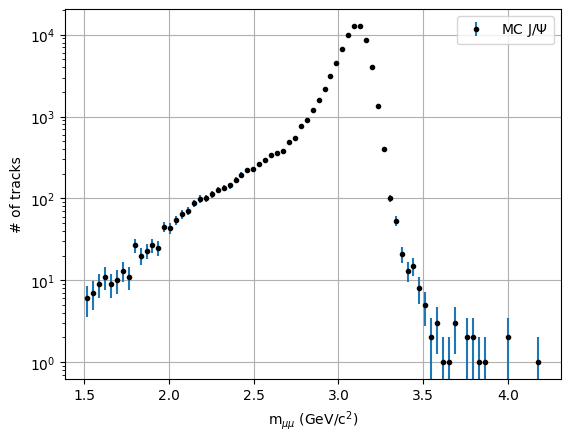

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [13385.413825400286, 3.1040063828901365, 0.06084036318396685, 0.8202844472210242, 3.2896272403754714, 2.7044202430482907, 2.6343164967173016]
pcov: 
 [[ 2.62335549e+04  3.91197372e-02 -7.06952872e-02 -2.93943236e-02
  -1.81974526e+00 -2.47446883e+00  6.51509086e+00]
 [ 3.91197372e-02  9.92791551e-07 -5.26641593e-07 -1.42071054e-05
   4.55579116e-05 -1.27714776e-05  2.20662028e-05]
 [-7.06952872e-02 -5.26641593e-07  6.06347784e-07  1.03610085e-05
  -2.38454455e-05  2.57315812e-05 -5.99959992e-05]
 [-2.93943236e-02 -1.42071054e-05  1.03610085e-05  5.01567318e-04
  -2.37278995e-03  3.98619154e-04 -8.30468390e-04]
 [-1.81974526e+00  4.55579116e-05 -2.38454455e-05 -2.37278995e-03
   1.70350975e-02 -7.60570757e-04  1.32670899e-03]
 [-2.47446883e+00 -1.27714776e-05  2.57315812e-05  3.98619154e-04
  -7.60570757e-04  2.67910868e-02 -1.09707560e-01]
 [ 6.51509086e+00  2.20662028e-05 -5.99959992e-05 -8.30468390e-04
   1.32670899e-03 -1.09707560e-01  5.78835387e-01]]
residual: 
 {'nfev': 1

fit error : 161.96968244113185


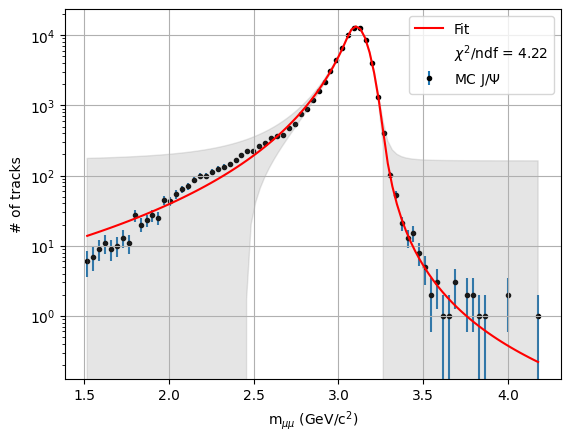

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

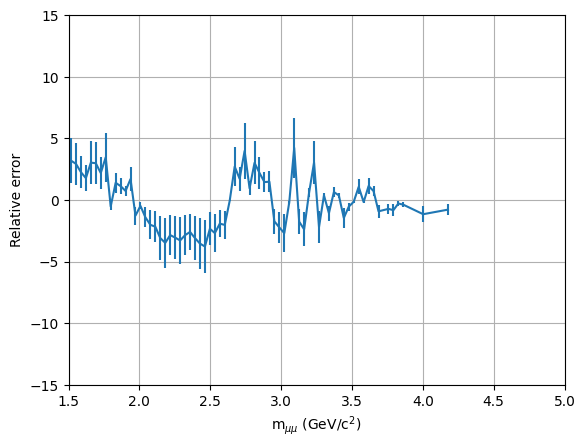

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

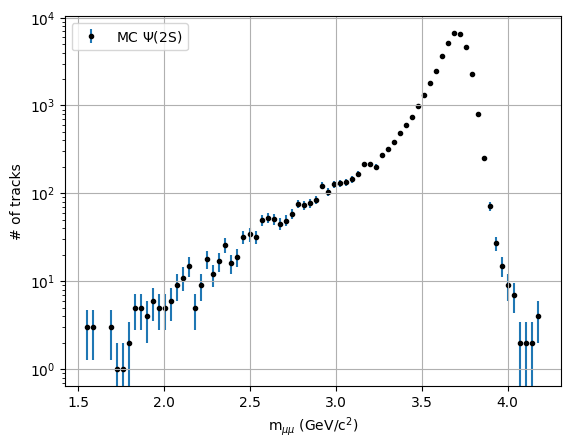

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [6921.626368561527, 3.7007572223667378, 0.06167932937476586, 0.7337979884725231, 3.340955800516436, 2.487260470429777, 3.92665017033069]
pcov: 
 [[ 1.05403123e+04  3.50854398e-02 -6.42785371e-02 -1.02289900e-01
  -1.43584772e+00 -4.44406698e+00  2.42951486e+01]
 [ 3.50854398e-02  1.72881713e-06 -1.01063924e-06 -2.13834302e-05
   6.41658477e-05 -4.34525432e-05  1.84023954e-04]
 [-6.42785371e-02 -1.01063924e-06  1.19759861e-06  1.70156388e-05
  -3.48033005e-05  9.25888545e-05 -4.85128017e-04]
 [-1.02289900e-01 -2.13834302e-05  1.70156388e-05  5.72063688e-04
  -2.54203925e-03  1.16392280e-03 -5.74300743e-03]
 [-1.43584772e+00  6.41658477e-05 -3.48033005e-05 -2.54203925e-03
   1.86246904e-02 -1.80242793e-03  7.68897652e-03]
 [-4.44406698e+00 -4.34525432e-05  9.25888545e-05  1.16392280e-03
  -1.80242793e-03  4.88382910e-02 -3.76479699e-01]
 [ 2.42951486e+01  1.84023954e-04 -4.85128017e-04 -5.74300743e-03
   7.68897652e-03 -3.76479699e-01  3.66251907e+00]]
residual: 
 {'nfev': 14, 'f

fit error : 102.6841901448734


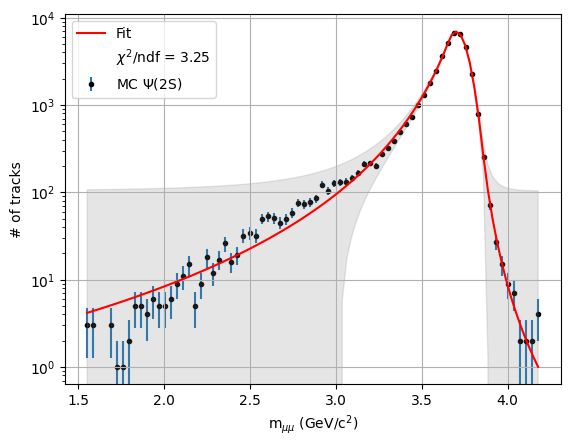

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

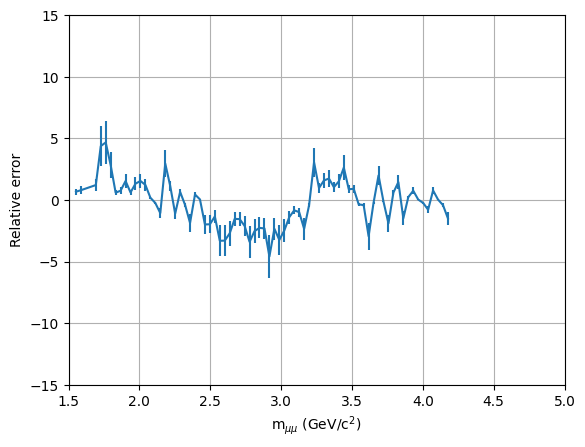

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

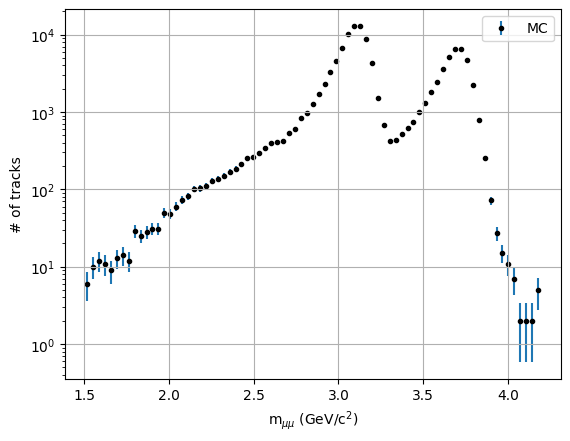

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [13438.22429395712, 3.1036355707014716, 0.06087048848296979, 6949.792122316673, 3.7011201919529797, 0.0611802763691975]
pcov: 
 [[ 2.86485021e+04  3.29802578e-02 -7.16066970e-02 -1.57900114e+02
  -3.00993679e-03  3.60187442e-03]
 [ 3.29802578e-02  5.72675790e-07 -1.45747720e-07 -9.91907132e-05
   6.51278544e-09 -3.79147748e-09]
 [-7.16066970e-02 -1.45747720e-07  3.43095517e-07  2.82370291e-03
   4.48207757e-08 -5.75836814e-08]
 [-1.57900114e+02 -9.91907132e-05  2.82370291e-03  1.42943710e+04
   3.92871263e-02 -7.33676782e-02]
 [-3.00993679e-03  6.51278544e-09  4.48207757e-08  3.92871263e-02
   1.19910033e-06 -4.01240782e-07]
 [ 3.60187442e-03 -3.79147748e-09 -5.75836814e-08 -7.33676782e-02
  -4.01240782e-07  7.23143612e-07]]
residual: 
 {'nfev': 5, 'fvec': array([ 4.82023667,  2.82731152,  2.35892808,  3.16894203,  4.65621359,
        3.20632766,  3.28773622,  4.67926806,  0.24226418,  1.52211857,
        1.35206554,  1.25142508,  1.81161709, -0.77016191,  0.06062446,
       -0

fit error : 207.226622778926


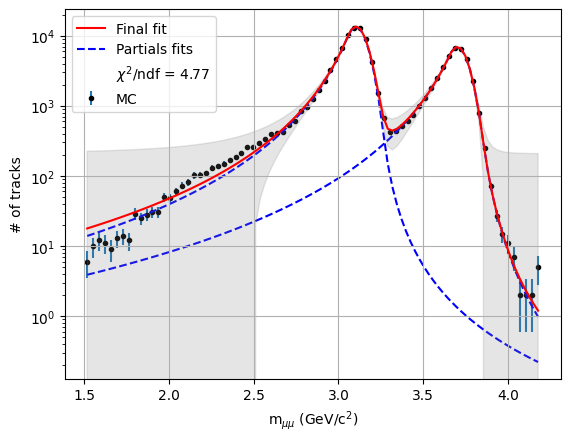

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_12193/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


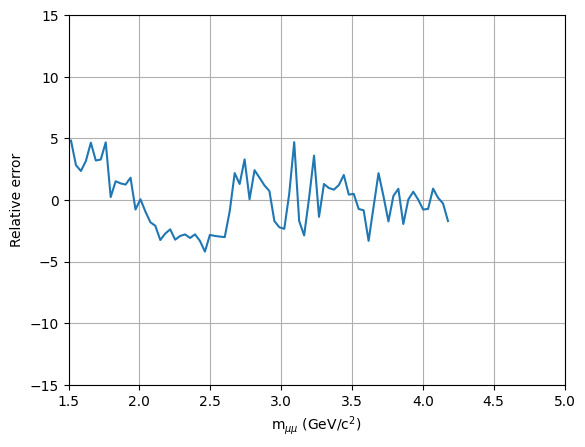

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

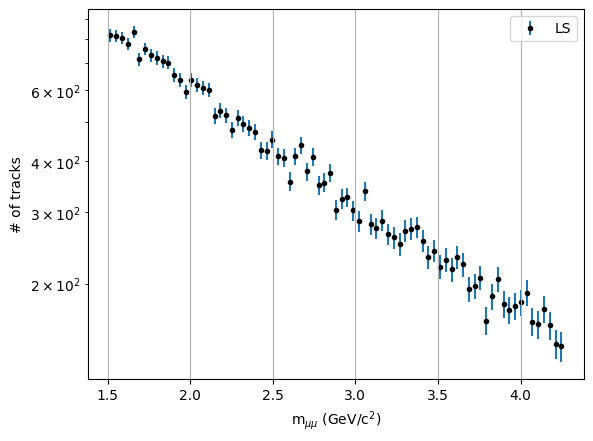

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.751861595414858, 6.07438709248994, 5.46575509550964, 5.27506473491608, 4.034489933420526]
pcov: 
 [[ 3.79878121e-04 -5.71520649e-05  5.18961720e-05 -5.66695346e-05
   2.93249211e-03]
 [-5.71520649e-05  8.98367124e-05  1.07655011e-05 -3.00812404e-05
   9.17507226e-04]
 [ 5.18961720e-05  1.07655011e-05  1.78158545e-04  1.66491743e-04
  -2.15001106e-03]
 [-5.66695346e-05 -3.00812404e-05  1.66491743e-04  4.12416024e-04
  -8.42511331e-03]
 [ 2.93249211e-03  9.17507226e-04 -2.15001106e-03 -8.42511331e-03
   3.69265766e-01]]
residual: 
 {'nfev': 13, 'fvec': array([ 0.98825242,  0.40882951,  0.04735605,  0.4398287 , -2.09579828,
        1.53148861, -0.70066037, -0.37864289, -0.55551377, -0.65001809,
       -1.07028635,  0.1525753 ,  0.29545389,  1.32469185, -0.89603158,
       -0.84881788, -0.98767677, -1.31588602,  1.63100979,  0.33782117,
        0.38569477,  1.69446919, -0.36793738, -0.19934115, -0.23883075,
       -0.22019762,  1.4503199 ,  1.01922859, -0.82997133,  0.63725952,


fit error : 0.6085442096147452


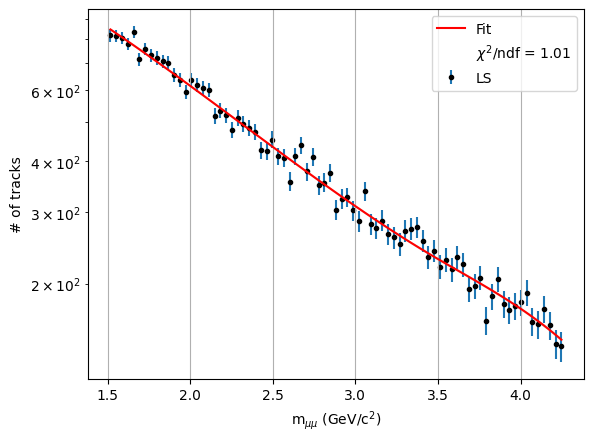

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

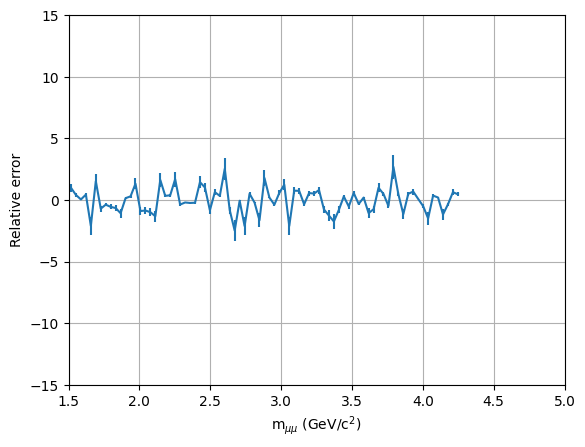

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

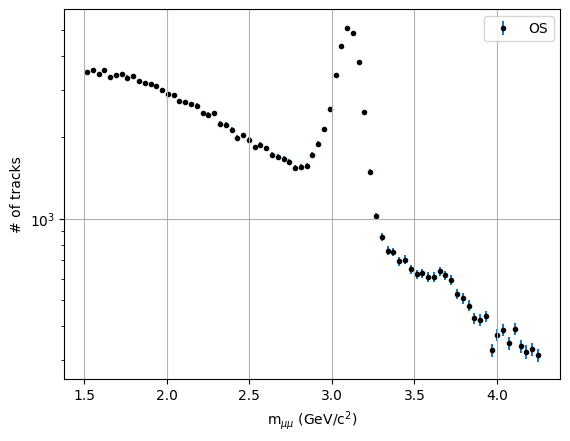

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [4267.204076665986, 3.1050978205890876, 0.06661385299991852, 119.93410539927073, 3.677416656454225, 0.06784726231224242, 8.15843543071763, 7.520316504436037, 6.442819161230035, 6.1349582176926, 4.381182536764718]
pcov: 
 [[ 3.46049622e+03  1.16537939e-02 -3.41525298e-02  2.29127596e+01
  -2.56766929e-02  4.42369877e-02 -3.15722513e-02 -1.26347995e-02
  -8.53558228e-02 -4.95851295e-02  4.25820280e-03]
 [ 1.16537939e-02  1.06155022e-06 -4.79460859e-07 -6.79897192e-05
   1.15290347e-06 -1.20199220e-06  7.68937400e-07  2.06717610e-06
   2.90864958e-06 -2.63329883e-07  5.76243530e-05]
 [-3.41525298e-02 -4.79460859e-07  1.22229700e-06  2.46169766e-03
  -2.20247169e-06  3.20978724e-06 -2.33850576e-06 -4.16875140e-06
  -9.50052456e-06 -3.80858210e-06 -4.52145694e-05]
 [ 2.29127596e+01 -6.79897192e-05  2.46169766e-03  5.66382116e+02
   3.53224413e-02 -1.02787687e-01 -9.59924934e-04 -4.73183659e-03
  -1.84647139e-01 -2.72271269e-01  5.20129579e+00]
 [-2.56766929e-02  1.15290347e-06 -2.20

fit error : 63.46109848699573


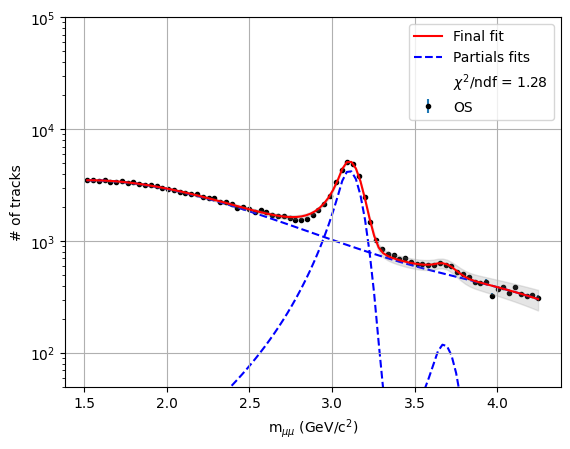

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

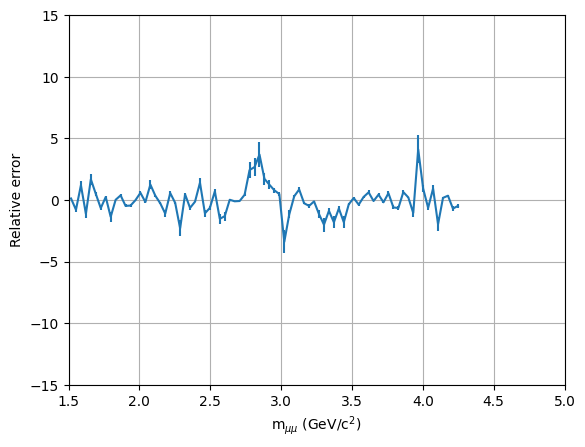

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  26253.505710487934  +/-  637.3313354763694 (stat.)
